# SELECTION DE MODEL

### Meta données

**- Contexte**

Les maladies cardiovasculaires sont la première cause de décès dans le monde, faisant environ 17,9 millions de vies chaque année, ce qui représente 31 % de tous les décès dans le monde. Quatre décès sur 5 par MCV sont dus à des crises cardiaques et à des accidents vasculaires cérébraux, et un tiers de ces décès surviennent prématurément chez des personnes de moins de 70 ans. L'insuffisance cardiaque est un événement courant causé par les maladies cardiovasculaires et cet ensemble de données contient 11 caractéristiques qui peuvent être utilisées pour prédire une éventuelle maladie cardiaque.

Les personnes atteintes de maladies cardiovasculaires ou à haut risque cardiovasculaire (en raison de la présence d'un ou plusieurs facteurs de risque tels que l'hypertension, le diabète, l'hyperlipidémie ou une maladie déjà établie) ont besoin d'une détection et d'une gestion précoces dans lesquelles un modèle d'apprentissage automatique peut être d'une grande aide.


**- Informations sur les attributs**

AGE : âge du patient,

SEXE : sexe du patient [homme, femme]

TDT : type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]

PAR : pression artérielle au repos [mm Hg]

CHOLESTEROL : cholestérol sérique [mm/dl]

GAJ : glycémie Ã  jeun [1 : si glycémie Ã  jeun > 120 mg/dl, 0 : sinon]

ECG au repos : résultats de l'electrocardiogramme au repos [Normal : normal, ST : présentant une anomalie de l'onde ST-T , HVG : montrant une hypertrophie ventriculaire gauche probable]

FCMAX : fréquence cardiaque maximale atteinte

ANGINE : angine induite par l'exercice [Oui, Non]

DEPRESSION : Valeur numérique mesurée en dépression

PENTE: la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]

COEUR : maladie cardiaque[1 : Présence de la maladie, 0 : Absence de la maladie]

## 1. Description des variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### a) Affichage des informations de base

In [2]:
DF = pd.read_excel('heart.xlsx')
df = DF.copy()
df.head(5)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


#### b) Description de base

In [3]:
df.rename(columns={'DEPRESSION ':'DEPRESSION',
                    'TDT':'TYPE_DOULEUR_THORACIQUE',
                   'PAR': 'PRESSION_ARTERIELLE_REPOS',
                   'GAJ':'GLYCEMIE_A_JEUNE',
                   'ECG':'ELECTROCARDIOGRAMME_REPOS',
                  'FCMAX':'FREQUENCE_CARDIAQUE_MAX',
                  'CŒUR':'COEUR'}, inplace=True)

In [4]:
df['COEUR'].replace({1:'presence', 0:'abscence'}, inplace=True)
df['GLYCEMIE_A_JEUNE'].replace({1:'sup 120mg/dl', 0:'inf 120mg/dl'}, inplace=True)

In [5]:
df_r = df.copy()

# 3. Pre-processing

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, LabelBinarizer, MinMaxScaler, StandardScaler,RobustScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import make_column_transformer

In [7]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [8]:
trainset['COEUR'].value_counts()

presence    401
abscence    333
Name: COEUR, dtype: int64

In [9]:
testset['COEUR'].value_counts()

presence    107
abscence     77
Name: COEUR, dtype: int64

In [10]:
def standardisation(df):
    list_num = list(df.select_dtypes(exclude = object))
    sc = StandardScaler()
    df[list_num] = sc.fit_transform(df[list_num])
    return df

In [11]:
def encoding(data):
    list_cat = list(df.select_dtypes(object))
    lbe = LabelEncoder()
    for col in list_cat:
        df[col] = lbe.fit_transform(df[col])
    return df

In [12]:
df.head()

,AGE,SEXE,TYPE_DOULEUR_THORACIQUE,PRESSION_ARTERIELLE_REPOS,CHOLESTEROL,GLYCEMIE_A_JEUNE,ELECTROCARDIOGRAMME_REPOS,FREQUENCE_CARDIAQUE_MAX,ANGINE,DEPRESSION,PENTE,COEUR
0,40,homme,AA,140,289,inf 120mg/dl,Normal,172,Non,0.0,Ascendant,abscence
1,49,femme,DNA,160,180,inf 120mg/dl,Normal,156,Non,1.0,Plat,presence
2,37,homme,AA,130,283,inf 120mg/dl,ST,98,Non,0.0,Ascendant,abscence
3,48,femme,ASY,138,214,inf 120mg/dl,Normal,108,Oui,1.5,Plat,presence
4,54,homme,DNA,150,195,inf 120mg/dl,Normal,122,Non,0.0,Ascendant,abscence


In [13]:
def preprocessing(df):
    
    df = standardisation(df)
    df = encoding(df)
    
    X = df.drop(['COEUR'], axis=1)
    y = df['COEUR']
    
    print(y.value_counts())
    
    return X, y

In [14]:
X_train, y_train = preprocessing(trainset)

1    508
0    410
Name: COEUR, dtype: int64


In [15]:
X_test, y_test = preprocessing(testset)

1    508
0    410
Name: COEUR, dtype: int64


### Procédure d'évaluation

In [16]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, chi2

In [17]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

# Modélisation

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [57]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [58]:
DecisionTree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [59]:
dict_of_models = {'DecisionTree': DecisionTree,
                  'RandomForest' : RandomForest,
                  'SVM': SVM,
                  'KNN': KNN
                 }

DecisionTree
[[384  26]
 [ 46 462]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       410
           1       0.95      0.91      0.93       508

    accuracy                           0.92       918
   macro avg       0.92      0.92      0.92       918
weighted avg       0.92      0.92      0.92       918

RandomForest
[[384  26]
 [ 46 462]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       410
           1       0.95      0.91      0.93       508

    accuracy                           0.92       918
   macro avg       0.92      0.92      0.92       918
weighted avg       0.92      0.92      0.92       918

SVM
[[330  80]
 [ 72 436]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       410
           1       0.84      0.86      0.85       508

    accuracy                           0.83       918
   macro avg       0.83      

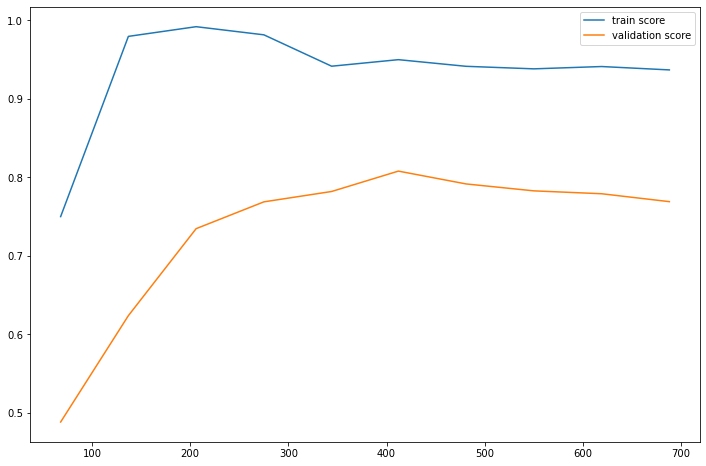

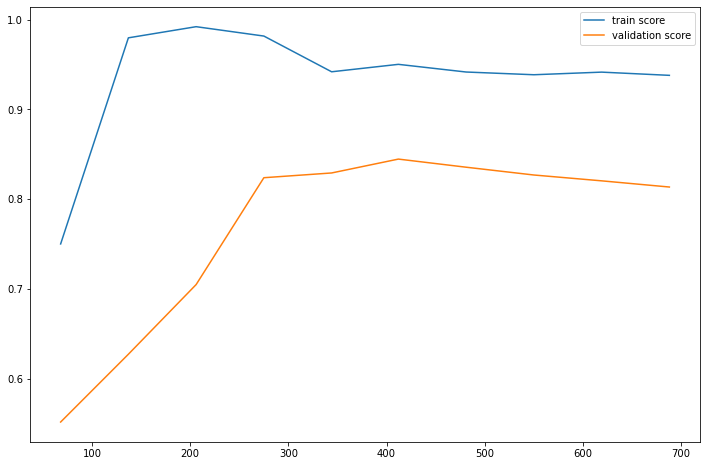

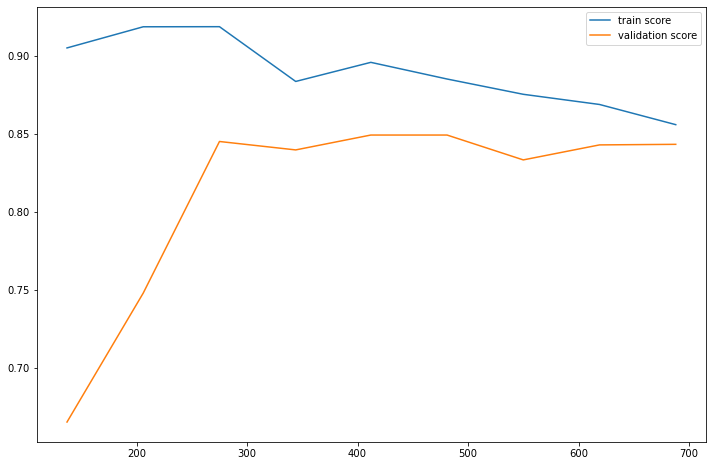

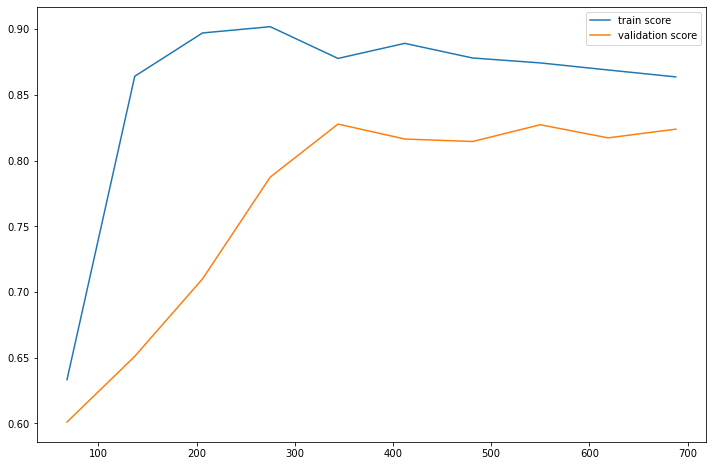

In [60]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

### Optimisation du model

In [23]:
select_feature = SelectKBest(f_classif, k=5).fit(X_train, y_train)

<AxesSubplot:>

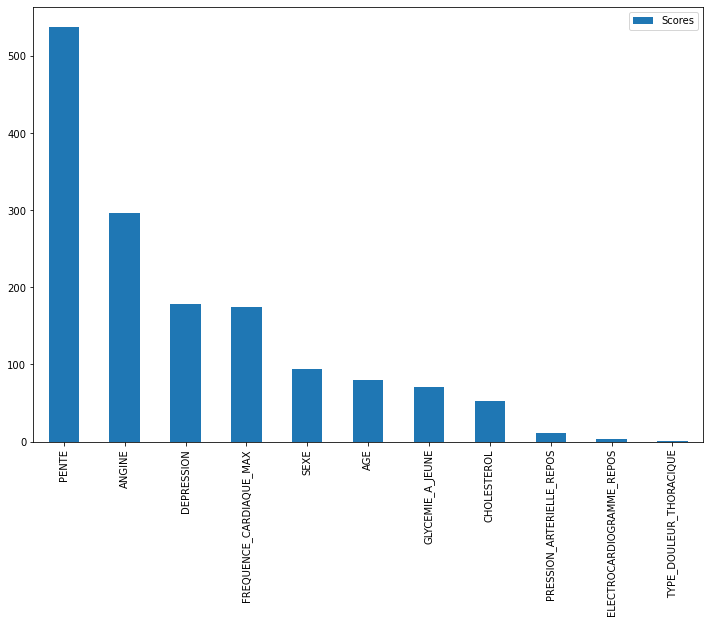

In [24]:
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':select_feature.scores_},index=X_train.columns)
selected_features_df.sort_values(by='Scores', ascending=False).plot.bar(figsize=(12, 8))

[[330  80]
 [ 72 436]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       410
           1       0.84      0.86      0.85       508

    accuracy                           0.83       918
   macro avg       0.83      0.83      0.83       918
weighted avg       0.83      0.83      0.83       918



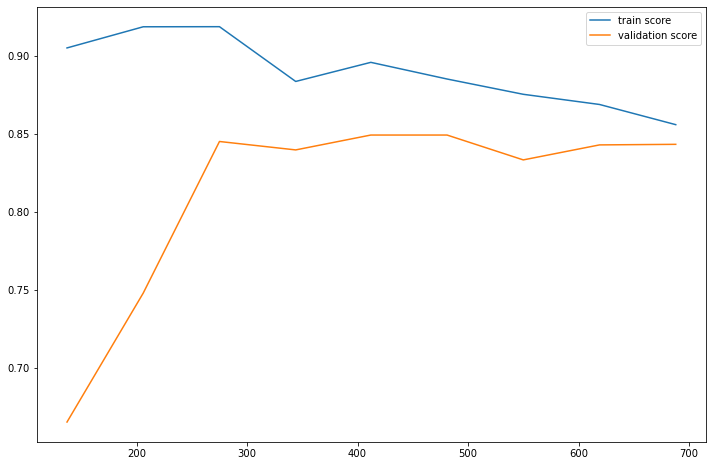

In [25]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(chi2, k=1))
evaluation(SVM)

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, f1_score

In [61]:
RFC = LogisticRegression()

In [62]:
rfecv = RFECV(estimator=RFC, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 5
Best features : Index(['SEXE', 'GLYCEMIE_A_JEUNE', 'ANGINE', 'DEPRESSION', 'PENTE'], dtype='object')


In [63]:
rfecv.grid_scores_

array([0.67955571, 0.72868258, 0.7613091 , 0.8386909 , 0.84848539,
       0.83980162, 0.82457828, 0.82676408, 0.82349133, 0.82133523,
       0.82024828])

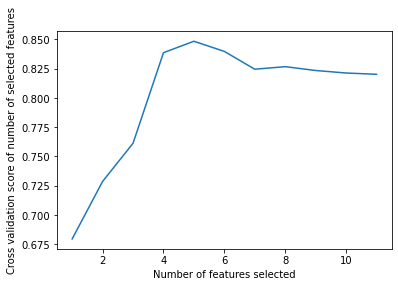

In [64]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [65]:
x_train_rfecv = rfecv.transform(X_train)
x_test_rfecv = rfecv.transform(X_test)

In [66]:
RFC_rfecv_model = RFC.fit(x_train_rfecv, y_train)

In [67]:
print('Accuracy is: ', accuracy_score(y_test,RFC_rfecv_model.predict(x_test_rfecv)))
print('F1 score is: ', f1_score(y_test,RFC_rfecv_model.predict(x_test_rfecv)))

Accuracy is:  0.8627450980392157
F1 score is:  0.8767123287671234
